Category Boosting(CatBoost) kategorik değişkenler ile otomatik olarak mücadele edebilen hızlı, başarılı bir GBM türevidir.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
df = pd.read_csv("../Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["League", "Division" , "NewLeague" ,"Salary"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N","Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=33)

In [10]:
from catboost import CatBoostRegressor

In [14]:
catb_model = CatBoostRegressor().fit(X_train, y_train, verbose = False)

In [16]:
y_pred = catb_model.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

241.4240077742593

In [42]:
catb_params = {"iterations": [200, 500],
               "learning_rate": [0.01, 0.1, 0.2],
               "depth": [8,10,15]
              }

In [44]:
catb_cv_model = GridSearchCV(catb_model, catb_params, cv=10, n_jobs=-1, verbose=False).fit(X_train, y_train)

0:	learn: 448.9354322	total: 4.74ms	remaining: 942ms
1:	learn: 431.9786841	total: 9.53ms	remaining: 944ms
2:	learn: 418.1504338	total: 13.7ms	remaining: 901ms
3:	learn: 403.3279465	total: 17.9ms	remaining: 878ms
4:	learn: 387.9783690	total: 22.7ms	remaining: 884ms
5:	learn: 371.7688185	total: 27.3ms	remaining: 882ms
6:	learn: 359.1362635	total: 31.1ms	remaining: 856ms
7:	learn: 346.1441782	total: 34.8ms	remaining: 835ms
8:	learn: 334.1997548	total: 39ms	remaining: 829ms
9:	learn: 321.4793961	total: 43.1ms	remaining: 819ms
10:	learn: 312.2786941	total: 47.1ms	remaining: 810ms
11:	learn: 302.0896811	total: 51.3ms	remaining: 804ms
12:	learn: 292.4061137	total: 55.7ms	remaining: 801ms
13:	learn: 283.4516838	total: 59.4ms	remaining: 790ms
14:	learn: 276.9736068	total: 63.5ms	remaining: 783ms
15:	learn: 269.4599471	total: 68.8ms	remaining: 791ms
16:	learn: 263.4941164	total: 72.9ms	remaining: 785ms
17:	learn: 256.2451571	total: 76.7ms	remaining: 776ms
18:	learn: 249.4694400	total: 80.4ms	rem

In [45]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.1}

In [80]:
catb_tuned = CatBoostRegressor(depth = 8, iterations = 200, learning_rate = 0.1).fit(X_train, y_train)

0:	learn: 448.9354322	total: 6.84ms	remaining: 1.36s
1:	learn: 431.9786841	total: 12.8ms	remaining: 1.26s
2:	learn: 418.1504338	total: 18.9ms	remaining: 1.24s
3:	learn: 403.3279465	total: 26.2ms	remaining: 1.28s
4:	learn: 387.9783690	total: 33ms	remaining: 1.29s
5:	learn: 371.7688185	total: 39.5ms	remaining: 1.28s
6:	learn: 359.1362635	total: 45.8ms	remaining: 1.26s
7:	learn: 346.1441782	total: 51.3ms	remaining: 1.23s
8:	learn: 334.1997548	total: 58.4ms	remaining: 1.24s
9:	learn: 321.4793961	total: 64.6ms	remaining: 1.23s
10:	learn: 312.2786941	total: 70.3ms	remaining: 1.21s
11:	learn: 302.0896811	total: 76.4ms	remaining: 1.2s
12:	learn: 292.4061137	total: 82.7ms	remaining: 1.19s
13:	learn: 283.4516838	total: 87.7ms	remaining: 1.17s
14:	learn: 276.9736068	total: 94ms	remaining: 1.16s
15:	learn: 269.4599471	total: 98.7ms	remaining: 1.14s
16:	learn: 263.4941164	total: 103ms	remaining: 1.11s
17:	learn: 256.2451571	total: 107ms	remaining: 1.08s
18:	learn: 249.4694400	total: 111ms	remaining

In [82]:
y_pred = catb_tuned.predict(X_test)

In [84]:
np.sqrt(mean_squared_error(y_test, y_pred))

246.74566870944295

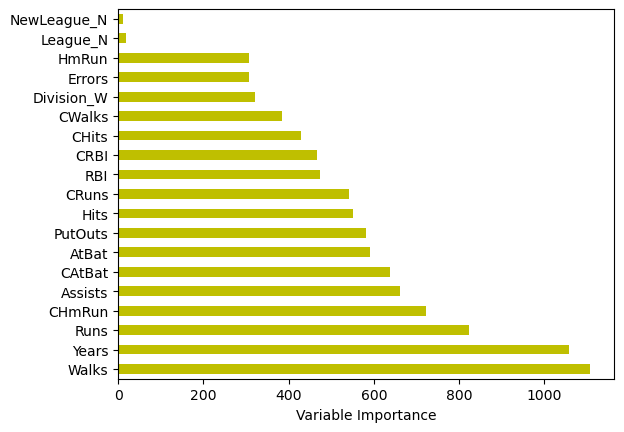

In [86]:
#degisken onem duzeyleri kontrolu
Importance = pd.DataFrame({"Importance": catb_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending=False).plot(kind = "barh", color = "y")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None